# Linear Regression: Engineering & Regularizaion
#### King Count Housing Data
* June 14, 2019
* Flatiron School, NYC (mhtn-ds-042219)

## Project Description
## Import libraries and set up environment

In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 300)

In [2]:
class LinearModeler():
    %matplotlib inline
    
    def __init__(self, data_file=''):
        self.df = None
        self.target = None
        self.features = None
        self.data_file = data_file
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.train_lm = None
        self.y_train_pred = None
        self.train_mae = None
        self.train_mse = None
        self.train_rmse = None
        self.y_pred = None
        self.test_mae = None
        self.test_rmse = None
        self.target_std = None
        
    def read_csv(self, data_file=''):
        if data_file != '':
            self.data_file = data_file
        try:
            self.df = pd.read_csv(self.data_file,index_col='id')
            return self.df.shape
            
        except Exception as e:
            print(e)
            
    def explore_data(self):
        self.df.shape

        #correlation matrix
        corrmat = self.df.corr()
        f, ax = plt.subplots(figsize=(12, 9))
        sns.heatmap(corrmat, vmax=.8, square=True)
        
    def plot_pairs(self, cols):
        sns.pairplot(self.df, vars=cols)
        
    def missing_data(self):
        #missing data
        total = self.df.isnull().sum().sort_values(ascending=False)
        percent = (self.df.isnull().sum()/self.df.isnull().count()).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        return missing_data.head(20)
        
    def set_target_and_features(self, target, features):
        self.target = self.df[target]
        self.features = self.df[features]
        
    def evaluate_train_set(self):
        try:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.features, self.target, random_state=34,test_size=0.2)
        except Exception as e:
            print(e)
            
        print("Training set - Features: ", self.X_train.shape, "Target: ", self.y_train.shape)
        print("Test set - Features: ", self.X_test.shape, "Target: ",self.y_test.shape)
        
        #instantiate a linear regression object
        self.train_lm = linear_model.LinearRegression()

        #fit the linear regression to the data
        self.train_lm = self.train_lm.fit(self.X_train, self.y_train)


        print('\nTRAINING STATS')
        print('Training Intercept: {}'.format(self.train_lm.intercept_))
        print('Training Coefficients:\n{}'.format(self.train_lm.coef_))
        print ("Training R^2 Score:", self.train_lm.score(self.X_train, self.y_train))
        
        self.y_train_pred = self.train_lm.predict(self.X_train)
        self.train_mae = metrics.mean_absolute_error(self.y_train, self.y_train_pred)
        self.train_mse = metrics.mean_squared_error(self.y_train, self.y_train_pred)
        self.train_rmse = np.sqrt(metrics.mean_squared_error(self.y_train, self.y_train_pred))


        print('TRAINING ERRORS')
        print('Mean Absolute Error:', self.train_mae )
        print('Mean Squared Error:',  self.train_mse)
        print('Root Mean Squared Error:' , self.train_rmse)
        
        self.target_std = self.target.std()

        print('Mean Absolute Error:', self.train_mae/self.target_std)
        print('Root Mean Squared Error:' , self.train_rmse/self.target_std)
            

    def predict_test(self):
        self.y_pred = self.train_lm.predict(self.X_test)
        plt.scatter(self.y_test, self.y_pred)
        plt.xlabel("True Values")
        plt.ylabel("Predictions")
        sns.residplot(self.y_pred, self.y_test, lowess=True, color="g")
        
        print ("Test R^2 Score:", self.train_lm.score(self.X_test, self.y_test))
        
        self.test_mae = metrics.mean_absolute_error(self.y_test, self.y_pred)
        self.test_rmse = np.sqrt(metrics.mean_squared_error(self.y_test, self.y_pred))


        print('Mean Absolute Error:' + str(metrics.mean_absolute_error(self.y_test, self.y_pred)))
        print('Mean Squared Error:' + str(metrics.mean_squared_error(self.y_test, self.y_pred)))
        print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(self.y_test, self.y_pred))))
        
        print('Mean Absolute Error  Z:', self.test_mae/self.target_std )
        print('Root Mean Squared Error Z:' , self.test_rmse/self.target_std)
        
        print('Training: ', self.train_rmse, "vs. Testing: ", self.test_rmse)
        
    def set_polynomial(self, degree):
        #instantiate this class
        poly = PolynomialFeatures(degree, interaction_only=False)
        #fit and transform the data and create a  new dataframe
        df_poly = pd.DataFrame(poly.fit_transform(self.features), columns=poly.get_feature_names(self.features.columns))
        self.features = df_poly
        
        
        
            

## Load Data

In [3]:
data_file = 'kc_housing_data_for_feat_engineering_lab.csv'

KC = LinearModeler()
KC.read_csv(data_file)

(21600, 24)

## Explore Data

In [4]:
# KC.missing_data()

In [5]:
# KC.explore_data()

In [6]:
# cols  = ['price_log', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#          'grade', 'sqft_above','sqft_basement', 'yr_renovated', 
#        'sqft_living15', 'sqft_lot15', 'yr_old', 'since_sold']

# KC.plot_pairs(cols)

In [7]:
KC.df['date'] = pd.to_datetime(KC.df['date'])
KC.df['sqft_living_log'] = np.log(KC.df['sqft_living'])
KC.df['sqft_above_log'] = np.log(KC.df['sqft_above'])
KC.df['sqft_living15_log'] = np.log(KC.df['sqft_living15'])
KC.df['price_log'] = np.log(KC.df['price'])

## Build Training Model

In [8]:
feature_columns = ['bedrooms', 'bathrooms', 'sqft_lot','floors', 'waterfront', 
 'view', 'condition', 'grade','sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
 'sqft_lot15', 'yr_old', 'since_sold','sqft_living_log', 
 'sqft_above_log', 'sqft_living15_log']

KC.set_target_and_features('price_log', feature_columns)

### Evaluate the Training Set

In [9]:
KC.evaluate_train_set()

Training set - Features:  (17280, 19) Target:  (17280,)
Test set - Features:  (4320, 19) Target:  (4320,)

TRAINING STATS
Training Intercept: -20.883709647742247
Training Coefficients:
[-2.95284939e-02  6.76271235e-02  4.67685043e-07  7.24944057e-02
  3.84209274e-01  6.45409435e-02  5.90078331e-02  1.62568426e-01
  5.09082275e-05  3.15747892e-05 -6.02951584e-04  1.40476399e+00
 -1.69048344e-01 -2.58305927e-07  3.62495801e-03 -5.02750991e-02
  2.40406675e-01  8.19639569e-02  1.99763370e-01]
Training R^2 Score: 0.7745409109460175
TRAINING ERRORS
Mean Absolute Error: 0.19379284429498597
Mean Squared Error: 0.062340349238912386
Root Mean Squared Error: 0.24968049431005296
Mean Absolute Error: 0.37005746529101885
Root Mean Squared Error: 0.47677782527586043


### Predict Baseline Model against the Test Set

Test R^2 Score: 0.7634767313422355
Mean Absolute Error:0.19404984610085096
Mean Squared Error:0.06269274468615459
Root Mean Squared Error:0.25038519262559156
Mean Absolute Error  Z: 0.3705482235395992
Root Mean Squared Error Z: 0.47812348317871944
Training:  0.24968049431005296 vs. Testing:  0.25038519262559156


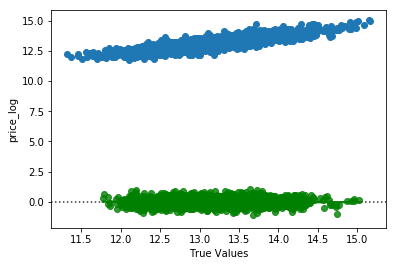

In [10]:
KC.predict_test()

### Build a Polynomial Version

In [11]:
degree = 2
KC.set_polynomial(degree)

In [12]:
KC.evaluate_train_set()

Training set - Features:  (17280, 210) Target:  (17280,)
Test set - Features:  (4320, 210) Target:  (4320,)

TRAINING STATS
Training Intercept: 53888.49456037325
Training Coefficients:
[ 2.40810581e-03  2.03000742e+01  6.65168429e-01 -3.52713725e-04
 -6.75285686e+01  5.57188444e+01  2.92697401e+00 -5.40314534e-01
 -2.21082556e+01 -3.50764727e-02  2.73923617e-02 -5.24156698e-01
  1.63095649e+02  5.23772387e+02 -5.21338219e-05 -4.51701889e-02
  1.98232654e-01 -4.82843315e+01  7.71711110e+01 -8.54278703e+00
 -1.52518040e-03  2.49484161e-03  4.57331061e-08  3.90568548e-02
 -1.25852300e-02  3.81815070e-03  1.12364690e-03  1.01246516e-03
 -2.02409464e-06 -1.49200327e-05 -1.94212367e-04 -5.22119637e-03
  7.73266121e-03  9.26469041e-08  4.26397326e-04  1.01660278e-02
  1.96990500e-03 -3.17645035e-02  3.80911283e-03 -1.96329650e-03
 -6.49599266e-07 -6.50187248e-02 -1.28441707e-02  2.43768591e-03
 -1.09583292e-02  8.05792940e-03 -2.01268239e-05  1.19924539e-06
 -9.60964265e-05  8.51826572e-02 -3

In [13]:
KC.X_train.head()

,1,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,sqft_living_log,sqft_above_log,sqft_living15_log,bedrooms^2,bedrooms bathrooms,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_basement,bedrooms yr_renovated,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_lot15,bedrooms yr_old,bedrooms since_sold,bedrooms sqft_living_log,bedrooms sqft_above_log,bedrooms sqft_living15_log,bathrooms^2,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_basement,bathrooms yr_renovated,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_lot15,bathrooms yr_old,bathrooms since_sold,bathrooms sqft_living_log,bathrooms sqft_above_log,bathrooms sqft_living15_log,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_basement,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_lot15,sqft_lot yr_old,sqft_lot since_sold,sqft_lot sqft_living_log,sqft_lot sqft_above_log,sqft_lot sqft_living15_log,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_basement,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_lot15,floors yr_old,floors since_sold,floors sqft_living_log,floors sqft_above_log,floors sqft_living15_log,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_basement,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_lot15,waterfront yr_old,waterfront since_sold,waterfront sqft_living_log,waterfront sqft_above_log,waterfront sqft_living15_log,view^2,view condition,view grade,view sqft_basement,view yr_renovated,view zipcode,view lat,view long,view sqft_lot15,view yr_old,view since_sold,view sqft_living_log,view sqft_above_log,view sqft_living15_log,condition^2,condition grade,condition sqft_basement,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_lot15,condition yr_old,condition since_sold,condition sqft_living_log,condition sqft_above_log,condition sqft_living15_log,grade^2,grade sqft_basement,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_lot15,grade yr_old,grade since_sold,grade sqft_living_log,grade sqft_above_log,grade sqft_living15_log,sqft_basement^2,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_lot15,sqft_basement yr_old,sqft_basement since_sold,sqft_basement sqft_living_log,sqft_basement sqft_above_log,sqft_basement sqft_living15_log,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_lot15,yr_renovated yr_old,yr_renovated since_sold,yr_renovated sqft_living_log,yr_renovated sqft_above_log,yr_renovated sqft_living15_log,zipcode^2,zipcode lat,zipcode long,zipcode sqft_lot15,zipcode yr_old,zipcode since_sold,zipcode sqft_living_log,zipcode sqft_above_log,zipcode sqft_living15_log,lat^2,lat long,lat sqft_lot15,lat yr_old,lat since_sold,lat sqft_living_log,lat sqft_above_log,lat sqft_living15_log,long^2,long sqft_lot15,long yr_old,long since_sold,long sqft_living_log,long sqft_above_log,long sqft_living15_log,sqft_lot15^2,sqft_lot15 yr_old,sqft_lot15 since_sold,sqft_lot15 sqft_living_log,sqft_lot15 sqft_above_log,sqft_lot15 sqft_living15_log,yr_old^2,yr_old since_sold,yr_old sqft_living_log,yr_old sqft_above_log,yr_old sqft_living15_log,since_sold^2,since_sold sqft_living_log,since_sold sqft_above_log,since_sold sqft_living15_log,sqft_living_log^2,sqft_living_log sqft_above_log,sqft_living_log sqft_living15_log,sqft_above_log^2,sqft_above_log sqft_living15_log,sqft_living15_log^2
11455,1.0,3.0,2.5,10200.0,1.0,0.0,0.0,3.0,7.0,800.0,0.0,98133.0,47.7295,-122.331,7850.0,39.0,2.0,7.677864,7.215240,7.605890,9.0,7.5,30600.0,3.0,0.0,0.0,9.0,21.0,2400.0,0.0,294399.

Test R^2 Score: 0.8179537542147961
Mean Absolute Error:0.16686593535621552
Mean Squared Error:0.04825309100813523
Root Mean Squared Error:0.2196658621819404
Mean Absolute Error  Z: 0.3186391391590396
Root Mean Squared Error Z: 0.4194633319188986
Training:  0.21456465801918487 vs. Testing:  0.2196658621819404


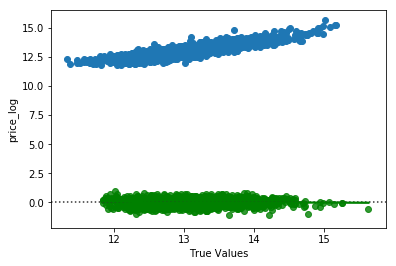

In [14]:
KC.predict_test()